In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./lakselus_per_fisk.csv')

# Check the first few rows of the data to understand its structure
data.head()

,week,year,Location number,Location name,Adult female lice,Lice in moving stages,Attached lice,Total lice,Probably without fish,Have counted salmon lice,...,Municipality,County number,County,Lat,Lon,Lice limit week,Over the lice limit week,Sea temperature,Production area Id,Production area
0,40,2023,30196,Ådnekvamme,NaN,NaN,NaN,0.0,Nei,Nei,...,MASFJORDEN,46.0,Vestland,60.832050,5.355017,0.5,NaN,NaN,4.0,Nordhordland til Stadt
1,40,2023,35297,Ådnøy Sø,NaN,NaN,NaN,0.0,Nei,Nei,...,SANDNES,11.0,Rogaland,58.914550,6.028583,0.5,NaN,NaN,2.0,Ryfylket
2,40,2023,30977,Æsøya,NaN,NaN,NaN,0.0,Nei,Nei,...,VESTVÅGØY,18.0,Nordland,68.104866,13.790067,0.5,NaN,NaN,9.0,Vestfjorden og Vesterålen
3,40,2023,15196,Aga Ø,NaN,NaN,NaN,0.0,Nei,Nei,...,BØMLO,46.0,Vestland,59.845917,5.260750,0.5,NaN,NaN,3.0,Karmøy til Sotra
4,40,2023,10331,Åkre,NaN,NaN,NaN,0.0,Ja,Nei,...,KVINNHERAD,46.0,Vestland,60.112830,6.044717,0.5,NaN,NaN,3.0,Karmøy til Sotra


In [2]:
data['Location number'].nunique()

1508

In [3]:
# Columns related to fish lice
lice_columns = ['Adult female lice', 'Lice in moving stages', 'Attached lice', 'Total lice']

# Count non-missing values for each lice column and sum them for each location
total_non_missing_counts = data.groupby('Location number')[lice_columns].count().sum(axis=1)

# Identify the location with the highest non-missing count across all lice columns
location_with_most_data_all = total_non_missing_counts.idxmax()
max_count_all = total_non_missing_counts.max()

location_with_most_data_all, max_count_all

(12154, 2134)

In [4]:
# Consider only the three specified lice columns
three_lice_columns = ['Adult female lice', 'Lice in moving stages', 'Attached lice']

# Identify rows where none of the three lice columns have missing values
rows_with_all_three_values = data[three_lice_columns].notnull().all(axis=1)

# For rows with values in all three columns, group by location number and count the rows
location_counts_all_three = data[rows_with_all_three_values].groupby('Location number').size()

# Identify the location with the highest count of rows with values in all three columns
location_with_most_rows_all_three = location_counts_all_three.idxmax()
max_rows_all_three = location_counts_all_three.max()

location_with_most_rows_all_three, max_rows_all_three

(12154, 524)

In [5]:
# Filter the dataset for location number 12154 and rows with non-missing values in all three lice columns
smørdalen_data = data[(data['Location number'] == 12154) & rows_with_all_three_values]

# # Save the filtered data to an Excel file
# file_path = "./location_12154_complete_lice_data.xlsx"
# smørdalen_data.to_excel(file_path, index=False)


In [6]:
# Count rows with missing sea temperature in the filtered data for location 12154 with complete lice data
empty_temperature_rows =smørdalen_data['Sea temperature'].isnull().sum()

empty_temperature_rows

0

In [7]:
smørdalen_data.isnull().sum(0)

week                        0
year                        0
Location number             0
Location name               0
Adult female lice           0
Lice in moving stages       0
Attached lice               0
Total lice                  0
Probably without fish       0
Have counted salmon lice    0
Municipality number         0
Municipality                0
County number               0
County                      0
Lat                         0
Lon                         0
Lice limit week             0
Over the lice limit week    0
Sea temperature             0
Production area Id          0
Production area             0
dtype: int64

In [8]:



smørdalen_data.head()

,week,year,Location number,Location name,Adult female lice,Lice in moving stages,Attached lice,Total lice,Probably without fish,Have counted salmon lice,...,Municipality,County number,County,Lat,Lon,Lice limit week,Over the lice limit week,Sea temperature,Production area Id,Production area
1946,39,2023,12154,Smørdalen,0.00,0.00,0.02,0.02,Nei,Ja,...,MASFJORDEN,46.0,Vestland,60.868183,5.551717,0.5,Nei,15.0,4.0,Nordhordland til Stadt
3014,38,2023,12154,Smørdalen,0.00,0.00,0.00,0.00,Nei,Ja,...,MASFJORDEN,46.0,Vestland,60.868183,5.551717,0.5,Nei,15.0,4.0,Nordhordland til Stadt
4083,37,2023,12154,Smørdalen,0.05,0.05,0.00,0.10,Nei,Ja,...,MASFJORDEN,46.0,Vestland,60.868183,5.551717,0.5,Nei,14.3,4.0,Nordhordland til Stadt
5154,36,2023,12154,Smørdalen,0.00,0.00,0.02,0.02,Nei,Ja,...,MASFJORDEN,46.0,Vestland,60.868183,5.551717,0.5,Nei,16.0,4.0,Nordhordland til Stadt
6224,35,2023,12154,Smørdalen,0.00,0.00,0.00,0.00,Nei,Ja,...,MASFJORDEN,46.0,Vestland,60.868183,5.551717,0.5,Nei,16.0,4.0,Nordhordland til Stadt


In [9]:
smørdalen_data.shape

(524, 21)

In [10]:
# Checking the unique values in the mentioned columns
unique_values = {
    "Probably without fish": smørdalen_data["Probably without fish"].unique(),
    "Have counted salmon lice": smørdalen_data["Have counted salmon lice"].unique()
}

unique_values

print(smørdalen_data["Probably without fish"].unique())
print(smørdalen_data["Have counted salmon lice"].unique())


['Nei']
['Ja']


In [11]:
# Identify columns with values "Nei" and "Ja"
binary_cols = [col for col in smørdalen_data.columns if set(smørdalen_data[col].unique()) == {"Nei", "Ja"}]
smørdalen_data.loc[:, "Probably without fish"] = smørdalen_data["Probably without fish"].map({"Ja": 1, "Nei": 0})
smørdalen_data.loc[:, "Have counted salmon lice"] = smørdalen_data["Have counted salmon lice"].map({"Ja": 1, "Nei": 0})

smørdalen_data.loc[:, "Over the lice limit week"] = smørdalen_data["Over the lice limit week"].map({"Ja": 1, "Nei": 0})


smørdalen_data.head(10)

,week,year,Location number,Location name,Adult female lice,Lice in moving stages,Attached lice,Total lice,Probably without fish,Have counted salmon lice,...,Municipality,County number,County,Lat,Lon,Lice limit week,Over the lice limit week,Sea temperature,Production area Id,Production area
1946,39,2023,12154,Smørdalen,0.00,0.00,0.02,0.02,0,1,...,MASFJORDEN,46.0,Vestland,60.868183,5.551717,0.5,0,15.0,4.0,Nordhordland til Stadt
3014,38,2023,12154,Smørdalen,0.00,0.00,0.00,0.00,0,1,...,MASFJORDEN,46.0,Vestland,60.868183,5.551717,0.5,0,15.0,4.0,Nordhordland til Stadt
4083,37,2023,12154,Smørdalen,0.05,0.05,0.00,0.10,0,1,...,MASFJORDEN,46.0,Vestland,60.868183,5.551717,0.5,0,14.3,4.0,Nordhordland til Stadt
5154,36,2023,12154,Smørdalen,0.00,0.00,0.02,0.02,0,1,...,MASFJORDEN,46.0,Vestland,60.868183,5.551717,0.5,0,16.0,4.0,Nordhordland til Stadt
6224,35,2023,12154,Smørdalen,0.00,0.00,0.00,0.00,0,1,...,MASFJORDEN,46.0,Vestland,60.868183,5.551717,0.5,0,16.0,4.0,Nordhordland til Stadt
7297,34,2023,12154,Smørdalen,0.05,0.00,0.00,0.05,0,1,...,MASFJORDEN,46.0,Vestland,60.868183,5.551717,0.5,0,16.0,4.0,Nordhordland til Stadt
8369,33,2023,12154,Smørdalen,0.00,0.00,0.00,0.00,0,1,...,MASFJORDEN,46.0,Vestland,60.868183,5.551717,0.5,0,16.0,4.0,Nordhordland til Stadt
9441,32,2023,12154,Smørdalen,0.00,0.00,0.05,0.05,0,1,...,MASFJORDEN,46.0,Vestland,60.868183,5.551717,0.5,0,17.3,4.0,Nordhordland til Stadt
10513,31,2023,12154,Smørdalen,0.15,0.00,0.00,0.15,0,1,...,MASFJORDEN,46.0,Vestland,60.868183,5.551717,0.5,0,14.5,4.0,Nordhordland til Stadt
11584,30,2023,12154,Smørdalen,0.10,0.04,0.00,0.14,0,1,...,MASFJORDEN,46.0,Vestland,60.868183,5.551717,0.5,0,15.9,4.0,Nordhordland til Stadt


In [12]:

# # Save the filtered data to an Excel file
# file_path = "./smordalen_fishfarm.xlsx"
# smørdalen_data.to_excel(file_path, index=False)

In [20]:

# smørdalen_data= pd.read_csv("./smordalen_fishfarm.xlsx")
# print(smørdalen_data[["Probably without fish", "Have counted salmon lice", "Over the lice limit week"]].head(10))

smørdalen_data = pd.read_excel("./smordalen_fishfarm.xlsx", engine='openpyxl')


In [12]:
# Let's inspect the data types of the smørdalen_data dataframe (assuming the name is smørdalen_data)
# If the dataframe has a different name, this step will produce an error and we'll need the correct name.
import numpy as np



smørdalen_data.loc[:, "Probably without fish"] = smørdalen_data["Probably without fish"].astype(int)
smørdalen_data.loc[:, "Have counted salmon lice"] = smørdalen_data["Have counted salmon lice"].astype(int)
smørdalen_data.loc[:, "Over the lice limit week"] = smørdalen_data["Over the lice limit week"].astype(int)
smørdalen_data.loc[:, "Lice limit week"] = smørdalen_data["Lice limit week"].astype(np.float64)

try:
    data_types = smørdalen_data.dtypes
except NameError:
    data_types = "Dataframe 'smørdalen_data' is not loaded in this environment."

data_types


week                          int64
year                          int64
Location number               int64
Location name                object
Adult female lice           float64
Lice in moving stages       float64
Attached lice               float64
Total lice                  float64
Probably without fish        object
Have counted salmon lice     object
Municipality number         float64
Municipality                 object
County number               float64
County                       object
Lat                         float64
Lon                         float64
Lice limit week              object
Over the lice limit week     object
Sea temperature             float64
Production area Id          float64
Production area              object
dtype: object

In [13]:



# Identify columns of type object
object_cols = smørdalen_data.select_dtypes(include=['object']).columns

# Convert these columns to numeric, setting errors='coerce' to turn invalid parsing into NaN
for col in object_cols:
  smørdalen_data.loc[:, col] = pd.to_numeric(smørdalen_data[col], errors='coerce')

smørdalen_data.drop(['Municipality','Municipality number', 'County number','County'], axis=1, inplace=True)


smørdalen_data.head(10)


C:\Users\Sarvi\AppData\Local\Temp\ipykernel_29936\2467042898.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smørdalen_data.drop(['Municipality','Municipality number', 'County number','County'], axis=1, inplace=True)


,week,year,Location number,Location name,Adult female lice,Lice in moving stages,Attached lice,Total lice,Probably without fish,Have counted salmon lice,Lat,Lon,Lice limit week,Over the lice limit week,Sea temperature,Production area Id,Production area
1946,39,2023,12154,NaN,0.00,0.00,0.02,0.02,0,1,60.868183,5.551717,0.5,0,15.0,4.0,NaN
3014,38,2023,12154,NaN,0.00,0.00,0.00,0.00,0,1,60.868183,5.551717,0.5,0,15.0,4.0,NaN
4083,37,2023,12154,NaN,0.05,0.05,0.00,0.10,0,1,60.868183,5.551717,0.5,0,14.3,4.0,NaN
5154,36,2023,12154,NaN,0.00,0.00,0.02,0.02,0,1,60.868183,5.551717,0.5,0,16.0,4.0,NaN
6224,35,2023,12154,NaN,0.00,0.00,0.00,0.00,0,1,60.868183,5.551717,0.5,0,16.0,4.0,NaN
7297,34,2023,12154,NaN,0.05,0.00,0.00,0.05,0,1,60.868183,5.551717,0.5,0,16.0,4.0,NaN
8369,33,2023,12154,NaN,0.00,0.00,0.00,0.00,0,1,60.868183,5.551717,0.5,0,16.0,4.0,NaN
9441,32,2023,12154,NaN,0.00,0.00,0.05,0.05,0,1,60.868183,5.551717,0.5,0,17.3,4.0,NaN
10513,31,2023,12154,NaN,0.15,0.00,0.00,0.15,0,1,60.868183,5.551717,0.5,0,14.5,4.0,NaN
11584,30,2023,12154,NaN,0.10,0.04,0.00,0.14,0,1,60.868183,5.551717,0.5,0,15.9,4.0,NaN


In [14]:
print(smørdalen_data['Lat'].unique())


[60.868183 60.8675  ]


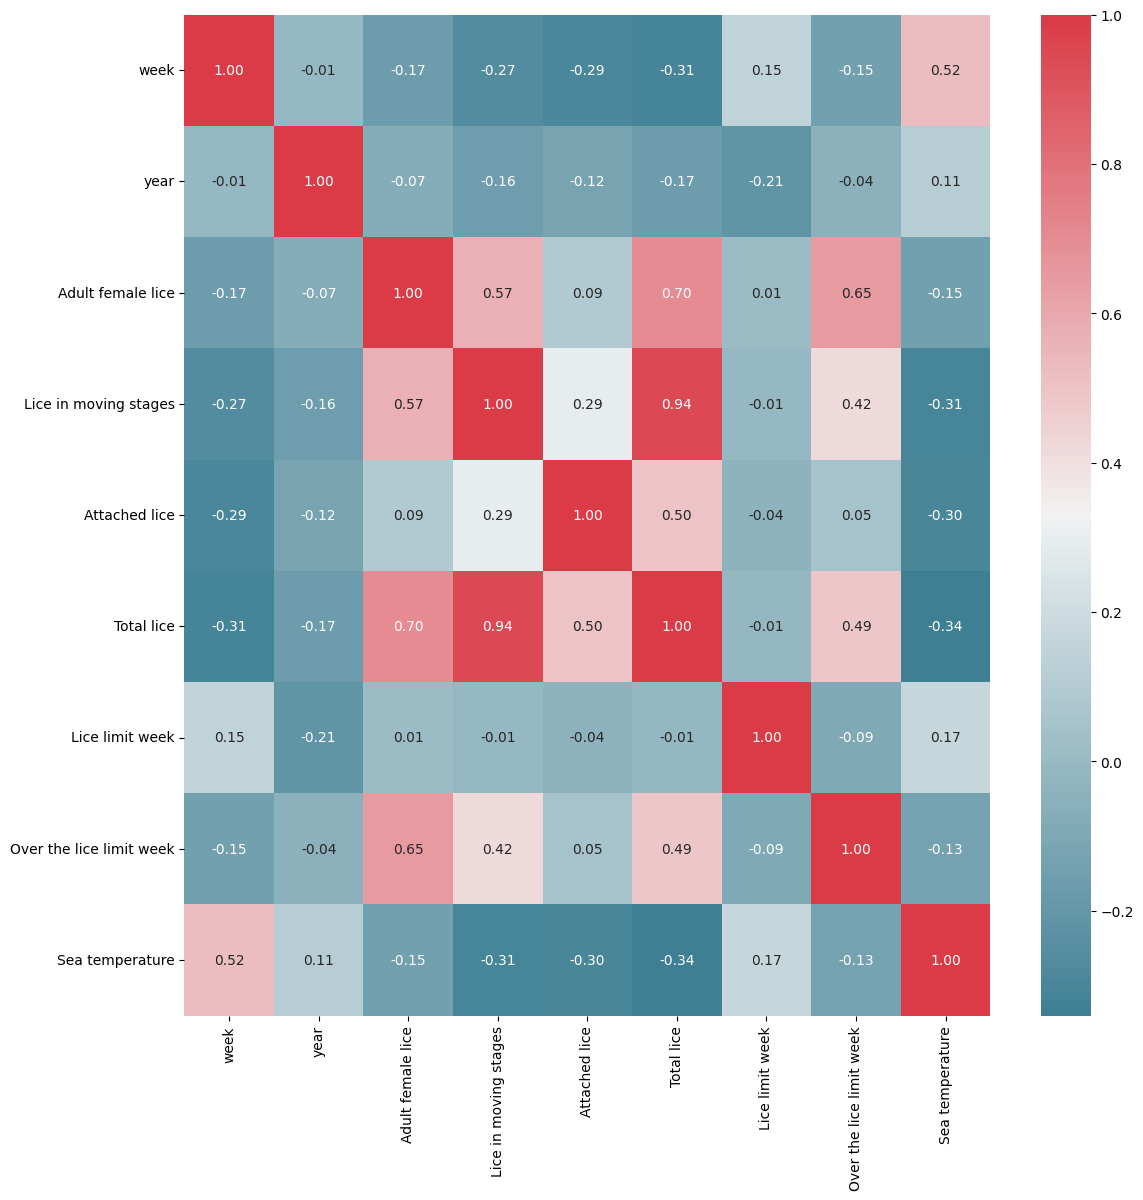

Index(['week', 'year', 'Adult female lice', 'Lice in moving stages',
       'Attached lice', 'Total lice', 'Lice limit week',
       'Over the lice limit week', 'Sea temperature'],
      dtype='object')
      week  year  Adult female lice  Lice in moving stages  Attached lice   
1946    39  2023               0.00                   0.00           0.02  \
3014    38  2023               0.00                   0.00           0.00   
4083    37  2023               0.05                   0.05           0.00   
5154    36  2023               0.00                   0.00           0.02   
6224    35  2023               0.00                   0.00           0.00   

      Total lice Lice limit week Over the lice limit week  Sea temperature  
1946        0.02             0.5                        0             15.0  
3014        0.00             0.5                        0             15.0  
4083        0.10             0.5                        0             14.3  
5154        0.02          

In [15]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt


# Exclude columns with constant values
non_constant_cols = smørdalen_data.columns[smørdalen_data.nunique() > 1]
filtered_data = smørdalen_data[non_constant_cols]

filtered_data = filtered_data.copy()
filtered_data.drop(['Lat','Lon'], axis=1, inplace=True)
# Compute the correlation on the filtered data
corr = filtered_data.corr()


# Set up the figure and axis
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(1,1,1)

# Set up the colormap
colormap = sbn.diverging_palette(220, 10, as_cmap=True)



# filtered_data.drop.([])





# Plot the heatmap
sbn.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", ax=ax)
plt.show()
print (filtered_data.columns)
print(filtered_data.head())
# print (corr)

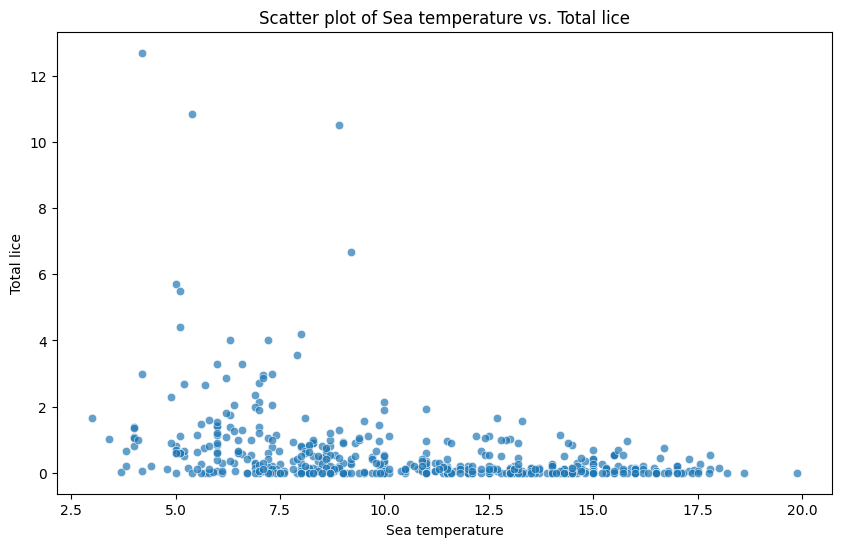

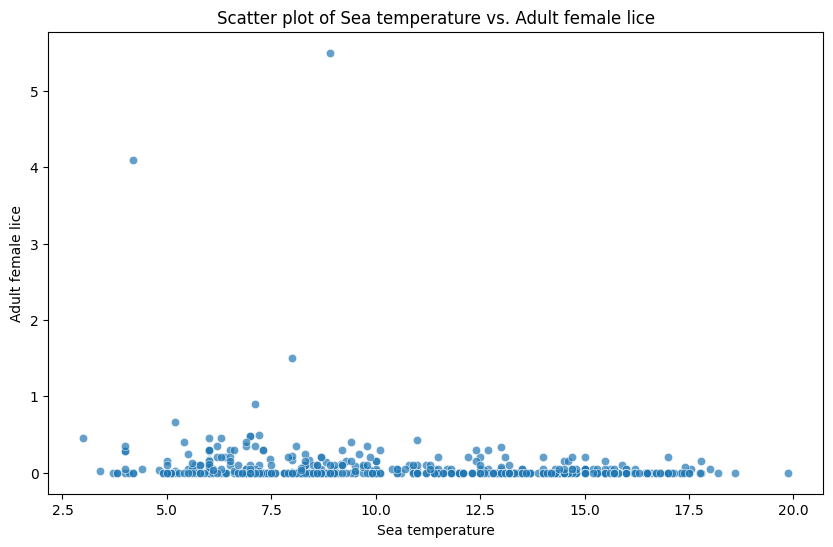

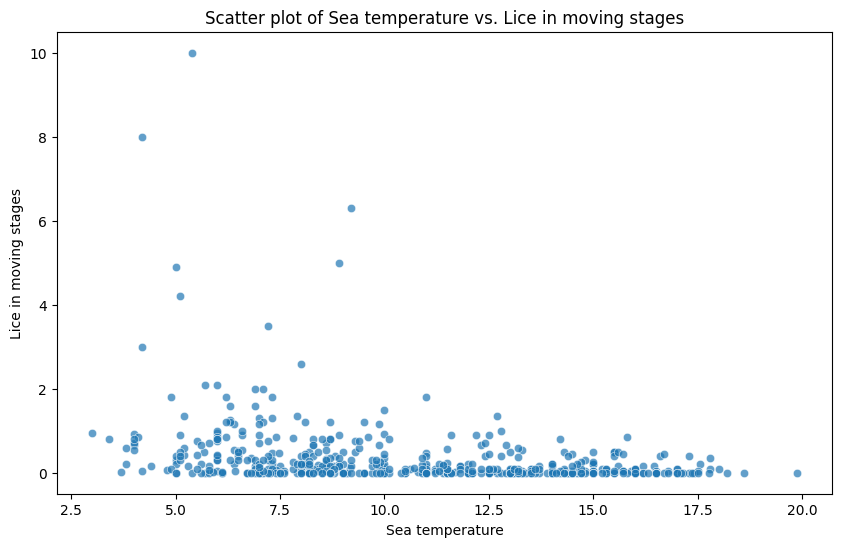

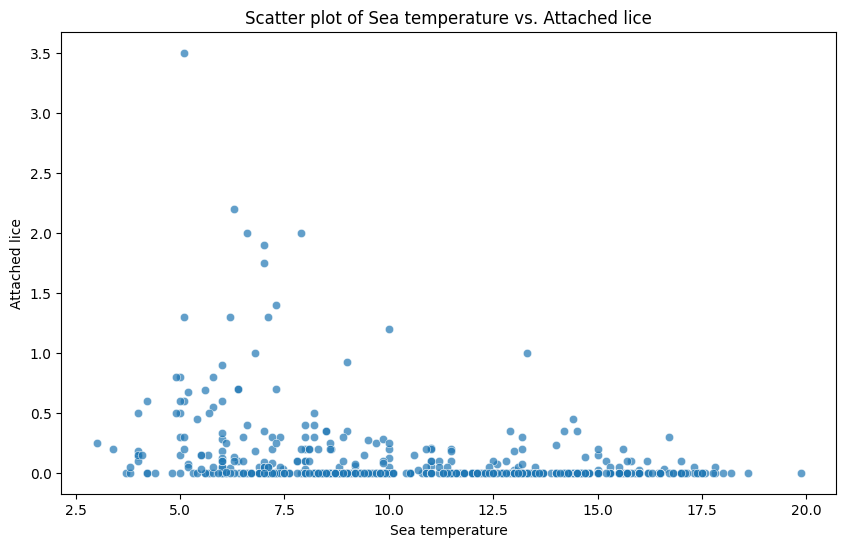

In [16]:
# Scatter plot for Sea temperature vs. Total lice
plt.figure(figsize=(10, 6))
sbn.scatterplot(data=filtered_data, x="Sea temperature", y="Total lice", alpha=0.7)
plt.title("Scatter plot of Sea temperature vs. Total lice")
plt.show()

# Scatter plot for Sea temperature vs. Adult female lice
plt.figure(figsize=(10, 6))
sbn.scatterplot(data=filtered_data, x="Sea temperature", y="Adult female lice", alpha=0.7)
plt.title("Scatter plot of Sea temperature vs. Adult female lice")
plt.show()

# Scatter plot for Sea temperature vs. Lice in moving stages
plt.figure(figsize=(10, 6))
sbn.scatterplot(data=filtered_data, x="Sea temperature", y="Lice in moving stages", alpha=0.7)
plt.title("Scatter plot of Sea temperature vs. Lice in moving stages")
plt.show()

# Scatter plot for Sea temperature vs. Attached lice
plt.figure(figsize=(10, 6))
sbn.scatterplot(data=filtered_data, x="Sea temperature", y="Attached lice", alpha=0.7)
plt.title("Scatter plot of Sea temperature vs. Attached lice")
plt.show()


C:\Users\Sarvi\AppData\Local\Temp\ipykernel_29936\3676419254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smørdalen_data["timeline"] = smørdalen_data["year"] + (smørdalen_data["week"] / 100)


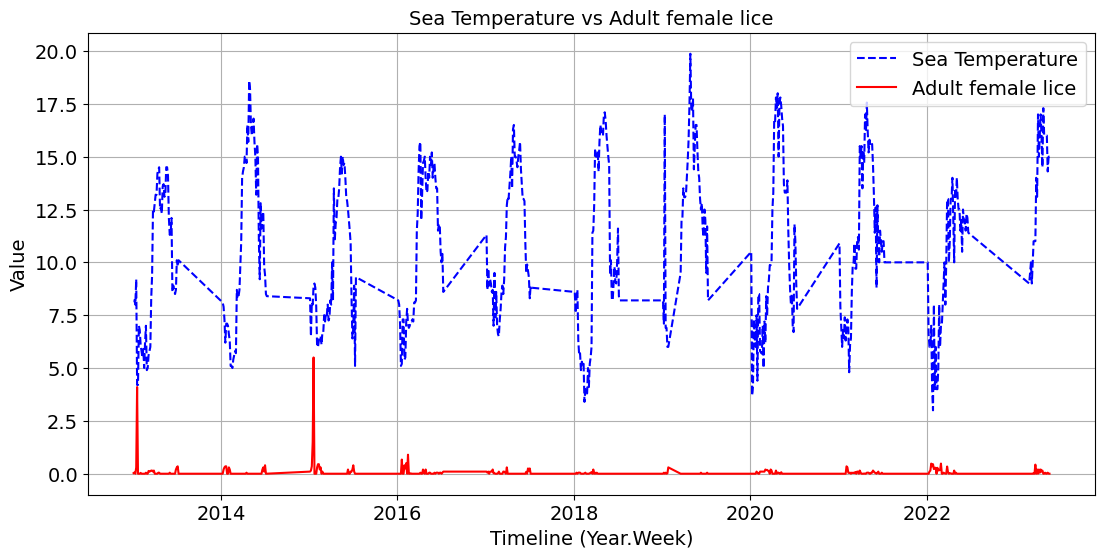

<Figure size 640x480 with 0 Axes>

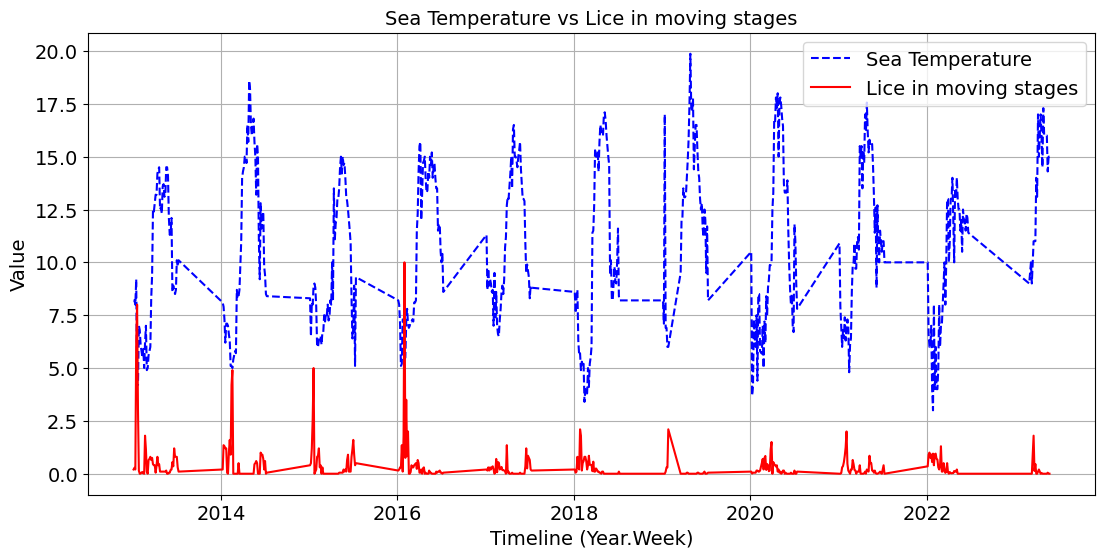

<Figure size 640x480 with 0 Axes>

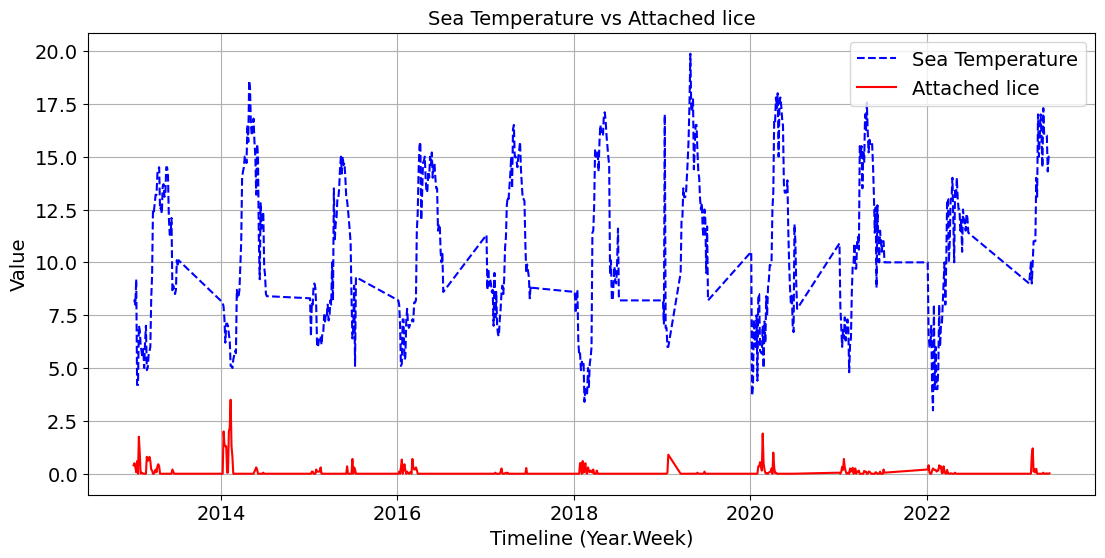

<Figure size 640x480 with 0 Axes>

In [29]:
# Create a timeline column
smørdalen_data["timeline"] = smørdalen_data["year"] + (smørdalen_data["week"] / 100)

# Then, use the 'timeline' column for plotting:
import matplotlib.pyplot as plt

# List of lice types
lice_types = ["Adult female lice", "Lice in moving stages", "Attached lice"]

# Loop through each lice type and create a separate plot
for lice_type in lice_types:
    plt.figure(figsize=(13, 6))
    
    # Plot sea temperature
    plt.plot(smørdalen_data["timeline"], smørdalen_data["Sea temperature"], label="Sea Temperature", color="blue", linestyle="--")
    
    # Plot lice count
    plt.plot(smørdalen_data["timeline"], smørdalen_data[lice_type], label=lice_type, color="red")
    
    plt.title(f"Sea Temperature vs {lice_type}",fontsize=14)
    plt.xlabel("Timeline (Year.Week)",fontsize=14)
    plt.ylabel("Value",fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(True)
    plt.xticks(fontsize=14)  # Adjust x-axis tick label size
    plt.yticks(fontsize=14)  
    plt.show()
    plt.savefig(f"Sea Temperature vs {lice_type}")
